In [270]:
import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('ggplot')

In [271]:
# データの読み込み
data = pd.read_csv("kc_house_data.csv")
df = pd.DataFrame(data)

In [272]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [273]:
df = df.loc[:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]

In [274]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,221900.0,3,1.00,1180,5650
1,538000.0,3,2.25,2570,7242
2,180000.0,2,1.00,770,10000
3,604000.0,4,3.00,1960,5000
4,510000.0,3,2.00,1680,8080


In [275]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
dtype: int64

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
price          21613 non-null float64
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
sqft_living    21613 non-null int64
sqft_lot       21613 non-null int64
dtypes: float64(2), int64(3)
memory usage: 844.3 KB


In [277]:
## 削除する場合

# 欠損値を削除する場合
# df = df.dropna() ## ある行の列に１つでも欠損値があると、その行を削除

# 欠損値の数を指定して削除（下の例の場合、同じ行に3つ以上欠損値があるとその行を削除）
# df.dropna(thresh=3)

# 特定の列を基準に、その列が欠損していない部分だけを残す
# df = df[df['col'].isnull()=False]

In [278]:
## 別の値で補完する場合

# 定数で補完
# df['col'] = df['col'].fillna(3)

# 平均値で補完する場合
# df['col'] = df['col'].fillna(df['col'].mean())

# 中央値で補完する場合
# df['col'] = df['col'].fillna(df['col'].median())

# 最頻値で補完する場合
# df['col'] = df['col'].fillna(df['col'].mode())

In [279]:
# 基本統計量の確認
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06


In [280]:
# 相関係数の計算
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
price,1.000000,0.308350,0.525138,0.702035,0.089661
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000


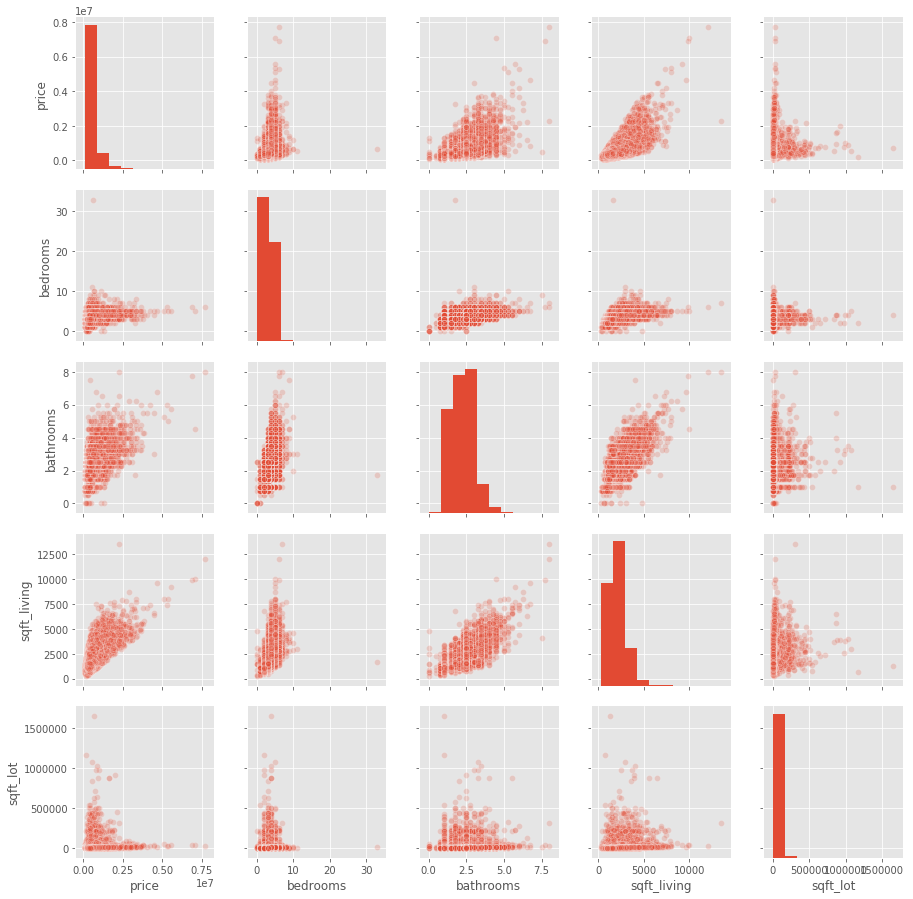

In [281]:
# 相関係数を可視化
sns.pairplot(df, plot_kws={'alpha': 0.2}) #alphaは透明度

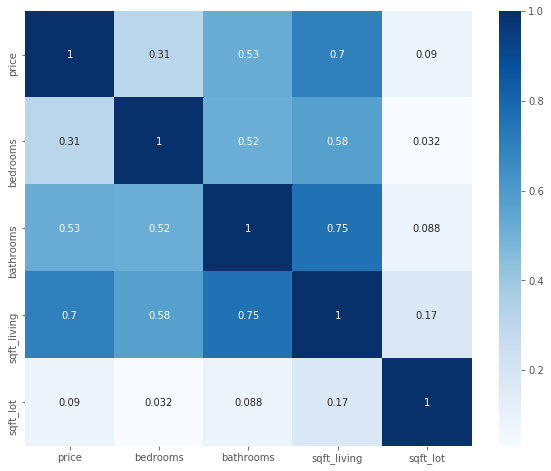

In [282]:
# ヒートマップを用いて、データの相関を可視化
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

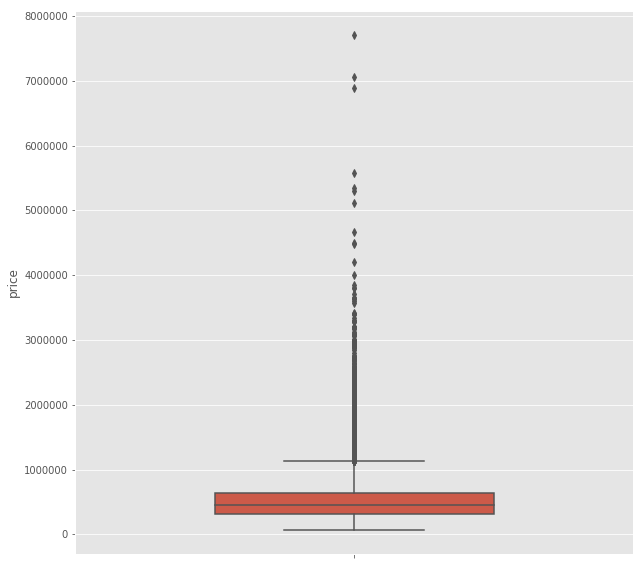

In [283]:
# 箱ひげ図でデータの散らばり具合を確認
plt.figure(figsize=(10, 10))
sns.boxplot(df['price'], orient='v', width=0.5)

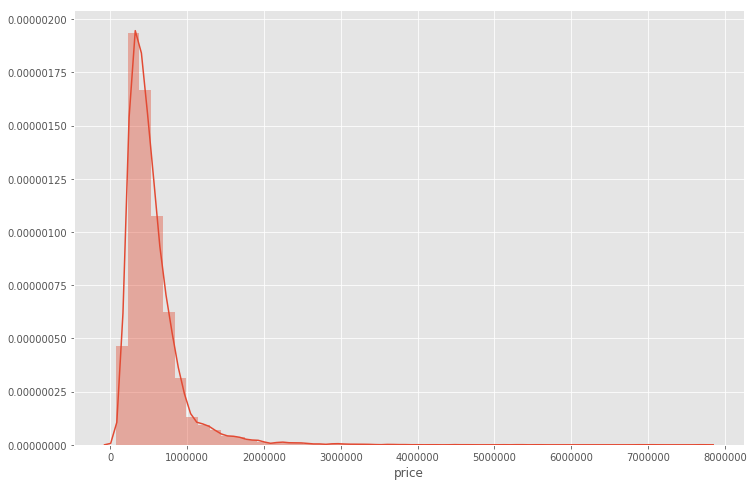

In [284]:
## ヒストグラムによる可視化
plt.figure(figsize=(12, 8))
sns.distplot(df['price'])

In [285]:
# 箱ひげ図の結果より、飛び抜けた値が存在している
# データ分析で飛び抜けた値を考慮してしまうと、何かと不都合が発生してしまうから、外れ値を除外する方法が必要

In [286]:
## 外れ値の処理
# 外れ値を処理するには、いくつか方法があるが、ここでは、四分位数と標準偏差を元にした処理の方法を考える

In [287]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], dtype='object')


In [288]:
## 四分位数を使った方法(四分位葉にの1.5倍以上離れているモノを除外)
def outlier_iqr(df, columns=None):
    if columuns == None:
        columns = df.columns
        
    for col in columns:
        q1 = df[col].describe()['25%']
        q3 = df[col].describe()['75%']
        
        # 四分位範囲
        igr = q3 - q1
        
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5
        
        # 範囲から外れている値を除く
        df = df[(df[col] >= outlier_min) & (df[col] <= outlier_max)]
        
    return df

In [289]:
## 標準偏差を使った方法（平均値から標準偏差のn倍離れているモノを除外）
def outlier_std(df, thresh=3, columns=None):
    if columns == None:
        columns = df.columns
        
    #print(columns)
    
    print(thresh)
        
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        # 平均値から標準偏差の何倍離れているかを計算
        border = (np.abs(df[col] - mean)) / std # absは絶対値
        
        # 標準偏差の3倍以上離れているデータを除外
        df = df[(border < 3)]
    
    return df

In [290]:
print("before", df.shape)
df = outlier_std(df, ['price'])
print("after", df.shape)

before (21613, 5)
['price']
after (20547, 5)


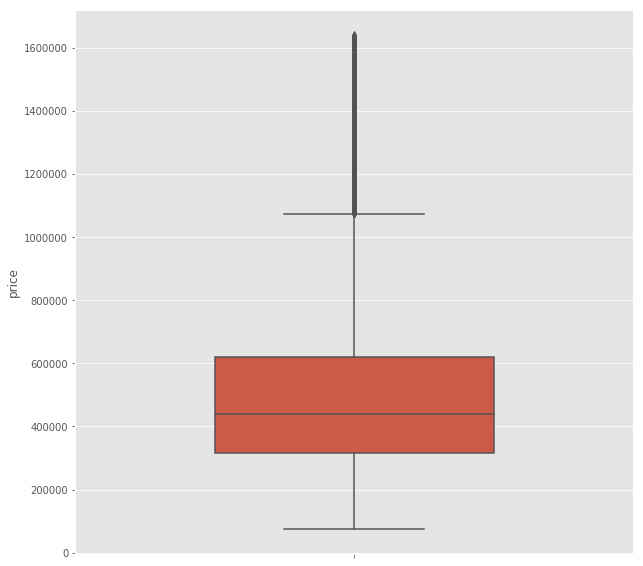

In [291]:
# 箱ひげ図でデータの散らばり具合を確認
plt.figure(figsize=(10, 10))
sns.boxplot(df['price'], orient='v', width=0.5)

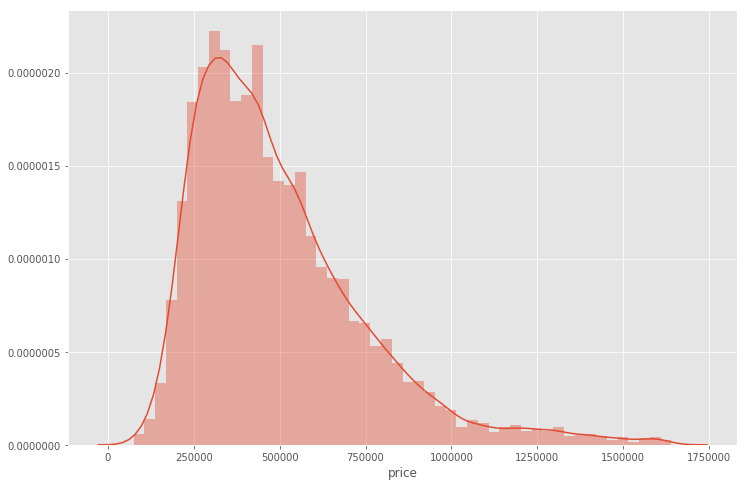

In [292]:
## ヒストグラムによる可視化
plt.figure(figsize=(12, 8))
sns.distplot(df['price'])

In [294]:
# 上の図より，どう考えても正規分布しているとは言えない（けっこう不都合）
# モデルによっては、正規分布していることを前提としているものもあるから

In [295]:
## 対数変換
# 正規分布に従わないデータでも、対数変換を施すことで、正規分布に近い形になるものがある

In [297]:
df['price'] = np.log1p(df['price'])
df['price'].head()

0    12.309987
1    13.195616
2    12.100718
3    13.311331
4    13.142168
Name: price, dtype: float64

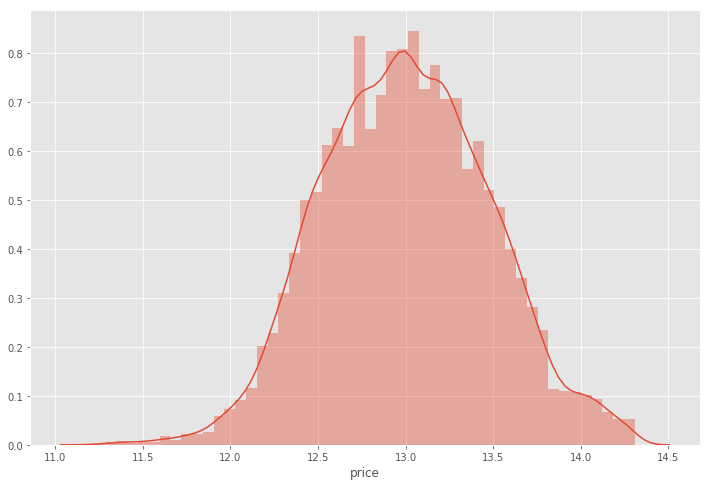

In [299]:
plt.figure(figsize=(12, 8))
sns.distplot(df['price'])

In [300]:
## スケーリング
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [301]:
for col in df.columns:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))

/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarni

In [302]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,-1.453661,-0.382456,-1.510184,-1.050276,-0.374743
1,0.402362,-0.382456,0.277368,0.765105,-0.252786
2,-1.892228,-1.545961,-1.510184,-1.585749,-0.041508
3,0.644868,0.781050,1.349899,-0.031573,-0.424536
4,0.290351,-0.382456,-0.080143,-0.397262,-0.188591
